In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
runnum = 37
endyear = 2035
h5_location = './../runs/run{}.h5'.format(runnum)

In [3]:
store = pd.HDFStore(h5_location)
parcels_lid = store['base/parcels'][['large_area_id']]
lids = parcels_lid.large_area_id.unique()
years = range(2016, endyear + 1)

In [4]:
def filterdf(df, use):
    if use=='res':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft == 0)]
    elif use=='nonres':
        return df.loc[(df.residential_units == 0)
                      & (df.non_residential_sqft > 0)]
    elif use=='mixed':
        return df.loc[(df.residential_units > 0)
                      & (df.non_residential_sqft > 0)]
    else:
        return df

In [5]:
results = pd.DataFrame(index=parcels_lid.large_area_id.unique())

for use in ['res', 'nonres', 'mixed', 'total']:
    for year in years:
        buildings_name = '{}/buildings'.format(year)
        buildings = store[buildings_name]
        buildings = filterdf(buildings, use)
        b = buildings[['year_built', 'parcel_id']]
        b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
        b = b.loc[b.year_built == year]
        built_by_lid = b.groupby('large_area_id').count().year_built
        results[year] = built_by_lid
    results.to_csv('run{}_{}.csv'.format(runnum, use))

In [6]:
total = pd.read_csv('run{}_total.csv'.format(runnum), index_col=0)

In [7]:
total

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
5,95,39,34,12,50,27.0,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,793,838,1057
3,637,308,371,174,3086,NaN,NaN,NaN,18.0,204,214.0,166.0,290.0,298.0,379.0,254.0,237.0,27,156,117
125,2065,965,675,539,8239,NaN,NaN,1.0,24.0,671,295.0,282.0,155.0,330.0,375.0,154.0,115.0,140,199,425
99,474,368,281,291,7231,NaN,NaN,NaN,40.0,625,223.0,189.0,248.0,208.0,164.0,111.0,152.0,100,149,95
161,493,491,629,440,829,885.0,701.0,148.0,146.0,143,133.0,190.0,178.0,138.0,105.0,228.0,164.0,83,126,153
115,178,54,31,5,834,NaN,NaN,54.0,33.0,32,8.0,59.0,37.0,3.0,33.0,49.0,38.0,48,7,5
147,211,91,9,26,199,NaN,30.0,40.0,10.0,25,77.0,27.0,28.0,28.0,19.0,27.0,64.0,30,40,43
93,665,241,82,129,1871,NaN,51.0,115.0,100.0,227,106.0,103.0,81.0,71.0,308.0,50.0,101.0,88,57,279


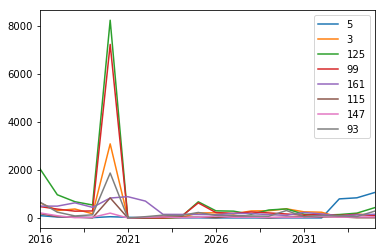

In [8]:
for l in lids:
    total.fillna(0).loc[l].plot(legend=True)

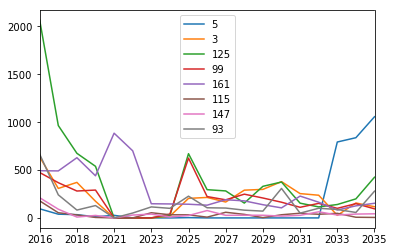

In [9]:
total_no_2020 = total[[c for c in total.columns if c not in ['2020']]]
for l in lids:
    total_no_2020.fillna(0).loc[l].plot(legend=True)
# total_no_2020

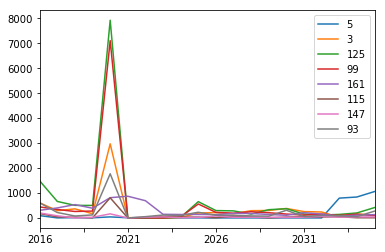

In [10]:
res = pd.read_csv('run{}_res.csv'.format(runnum), index_col=0)
for l in lids:
    res.fillna(0).loc[l].plot(legend=True)

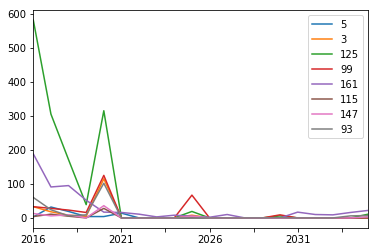

In [11]:
nonres = pd.read_csv('run{}_nonres.csv'.format(runnum), index_col=0)
for l in lids:
    nonres.fillna(0).loc[l].plot(legend=True)

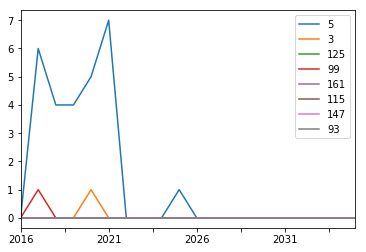

In [12]:
mixed = pd.read_csv('run{}_mixed.csv'.format(runnum), index_col=0)
for l in lids:
    mixed.fillna(0).loc[l].plot(legend=True)